# 서약
* 당연한 것을 아래와 같이 한번 다지고 가도록 하겠습니다. 아래 보고서는 **본인의 힘만으로 작성**해야하며, 다른 수강생에게 직접적인 질문, 복사 하는 행위는 모두 금지합니다 
  * 예를 들어서, 본 프로젝트의 코드 셀을 완성하는데 직접적인 질문 또는 복사하는 경우는 모두 금지합니다
  * 수업에서 제공한 코드, 노트북은 모두 재활용가능하며, 카피로 규정하지 않습니다
  * 수업 자료 이외에 참고자료가 있다면, 출처와 사용 부분에 모두 표시해하는 경우는 모두 합당한 자료로 인정하겠습니다
  
* 위에 대해서 모두 이해하고 동의했다면, 아래 `서약글`에 다음을 작성해주세요:

"본인은 위 서약글을 이해하고 동의하며, 프로젝트를 수행하는데 있어서 반칙을 할 경우 (제공자 포함) 본 프로젝트에 대한 점수가 반영되지 않는다는 것에 동의 합니다."

**서약서**

이름: 안원영

학번: 20155137

서약글: 본인은 위 서약글을 이해하고 동의하며, 프로젝트를 수행하는데 있어서 반칙을 할 경우 (제공자 포함) 본 프로젝트에 대한 점수가 반영되지 않는다는 것에 동의 합니다

# Final Project 

## Project: 강아지 품종을 분류하는 앱 제작

## Due date: 6월 22일

---

* 프로젝트를 수행하는데 있어서, 본 설명서를 자세하게 읽고, 요구하는 바를 충실하게 수행하시기 바랍니다
* 본 notebook에서는 부분적으로 코드와 설명이 들어 있습니다
* 아래 여러 셀에서 코드를 완성하는 부분을 수행하고, 설명을 요구하는 부분은 markdown으로 설명을 최대한 자세하게 적어주세요. 기준은 본인이 이해하고 있다는 것을 표현할 수 있는 부분을 모두 적으시면 됩니다.
  * 답을 작성하는 원칙은 **보고서**를 작성한다고 생각하시면 됩니다
  * 내가 알고 있는 부분을 충실하게 **글로 표현** 하는 것 또한 중요한 연습입니다 
  * 코드 작성은 **주석**으로 설명하시기 바랍니다
  
* 설명서에서 **'[답 작성]'** 라는 테그가 붙어 있는 부분은 모두 코드 작성을 요구하는 부분입니다
* 각 작성을 요구하는 부분에 대해서 설명을 자세하게 읽고 답변하시기 바랍니다.



> **제출방법**: 
모든 작성을 완료한 이후에는 다음 두가지를 제출합니다:

1. 본 notebook을 최종 실행하여, 모든 셀의 결과가 표출된 형태로 `html`또는 `pdf` 파일로 저장하여 제출 (html, pdf 파일 저장은 아래의 부록 3에 설명되어 있습니다.)
2. 완성된 notebook과 제공되지 않은 (새로 만들거나 사용한) 모든 자료를 압축하여 압축파일로 제출

* 본 보고서에서는 코드 작성이외에도, 각 코드를 작성하는 방법론과 설명을 작성해야하는 **서술형 문제**도 포함되어 있습니다.
* 서술형 문제는 채점하는 중요한 기준이 됩니다. 성실하게 작성해주세요.
* 서술형 문제에 대한 답변은 'markdown' 형태로 셀에 포함하여 작성하면 됩니다. 
* Markdown 셀의 경우는 더블클릭으로 편집 할 수 있습니다




---
### 목표: 앱을 위한 인공지능 알고리즘 개발~

* 본 보고서에서는 모바일/웹앱을 위한 인공지능 알고리즘을 개발하라는 업무를 부여받았다고 가정합니다
* 프로젝트가 완성본은, 사용자가 제공하는 image를 받아서:
1. 만약 image속에 개가 감지된다면, 프로그램은 개의 종(種)을 예측합니다
2. 만약 사람의 image가 감지된다면, 프로그램은 그 사람과 가장 비슷하다고 생각하는 개의 종을 알려줍니다 
3. 아래는 사진을 받았을 때에 프로그램 출력 예제입니다:

![Sample Dog Output](https://drive.google.com/uc?export=view&id=1AjaH0XW1UtCTnqdWCDKZU2lg_ANIeQT7)

위의 과제를 수행하기 위해서는 한개의 machine learning 모델로 구현하기 어렵습니다. 
아래 여러 단계적으로 구성을하여 완성하도록 합니다:

### 프로젝트 완성하기 위한 단계

아래 여러 단계로 진행합니다:

* [Step 0](#step0): Dataset 준비하기
* [Step 1](#step1): Detect Humans (human image 탐지)
* [Step 2](#step2): Detect Dogs (dog image 탐지)
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (dog 종 예측 프로그램)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (dog 종 예측 프로그램 2)
* [Step 5](#step5): Make Dog Identification App
* [Step 6](#step6): Test Dog Identification App

In [1]:
import numpy as np
from glob import glob
import random
import cv2                
import os
from pathlib import Path
from tqdm import tqdm
import torchvision
from torchvision import datasets
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizer
from PIL import ImageFile
from PIL import Image
import IPython
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---
<a id='step0'></a>
## Step 0: Dataset 준비하기


1. 아래 코드 셀은 google drive를 통해서 final project의 data를 받습니다.
2. __haarcascades 폴더__는 이후 Step 1의 Detect Humans 부분에서 OpenCV에서 제공하는 얼굴인식 알고리즘파일이 존재하는 폴더입니다. 
3. __images 폴더__는 dataset인 human과 dog dataset으로 구성되어 있으며 해당 dataset이 존재하는 폴더입니다.
4. __models 폴더__는 학습된 모델을 저장하기 위한 폴더 입니다.
5. __myImg 폴더__는 만들어진 App을 테스트 할때 사용할 이미지를 넣는 폴더입니다.
6. 코드 셀을 통해 다운로드가 정상적으로 되지 않을 경우 아래 링크에서 직접 다운로드 받을 수 있습니다


- Download the [final project data](https://drive.google.com/file/d/1vU_kIUMRIKg58HvZkPT367BMWPa5pWFH/view?usp=sharing).  프로젝트 notebook이 들어있는 경로에 `/haarcascades`, `/images`, `models`, `myImg` 폴더를 압축 풀기

* 아래 셀을 실행해서 dataset을 준비합니다.

In [2]:
# 해당 모듈이 필요합니다! 셀을 실행하여 설치하세요.
!pip install googledrivedownloader

In [3]:
import os
from zipfile import ZipFile
from google_drive_downloader import GoogleDriveDownloader as gdd


gdd.download_file_from_google_drive(file_id='1BIYPxeq6gIi1sRsIplPgGGdlrJPUqES2', dest_path='./final_project_data.zip')
with ZipFile('./final_project_data.zip', 'r') as f:
    f.extractall()
os.remove('./final_project_data.zip')

아래 셀을 실행하여, dataset이 잘 준비되었는지 확인합니다:
```
총 13233 개의 human images가 있습니다.
총 8351 개의 dog images가 있습니다. 
```

In [4]:
import random
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("images/lfw/*/*"))
dog_files = np.array(glob("images/dogImages/*/*/*"))

random.shuffle(human_files)
random.shuffle(dog_files)

# print number of images in each dataset
print('총 %d 개의 human images가 있습니다.' % len(human_files))
print('총 %d 개의 dog images가 있습니다.' % len(dog_files))


총 13233 개의 human images가 있습니다.
총 8351 개의 dog images가 있습니다.


'human_files'와 'dog_files'를 확인하세요

In [5]:
human_files

array(['images/lfw/Reyyan_Uzuner/Reyyan_Uzuner_0001.jpg',
       'images/lfw/Vicki_Zhao_Wei/Vicki_Zhao_Wei_0001.jpg',
       'images/lfw/Kieran_Prendergast/Kieran_Prendergast_0002.jpg', ...,
       'images/lfw/Laura_Bush/Laura_Bush_0003.jpg',
       'images/lfw/Marina_Anissina/Marina_Anissina_0001.jpg',
       'images/lfw/Jacques_Rogge/Jacques_Rogge_0004.jpg'], dtype='<U91')

<a id='step1'></a>
## Step 1: Detect Humans

* 본 step 1에서는, openCV에서 제공하는 [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)을 이용하여 사람의 얼굴을 인식하는 프로그램을 작성합니다

* OpenCV는 다양한 image processing tool을 제공하는 python package 입니다. 
* 우리가 활용할 얼굴인식 알고리즘은 XML 파일로 저장되어 있으며, [github](https://github.com/opencv/opencv/tree/master/data/haarcascades)에서 다운 받을 수 있지만, 편의를 위해서 해당 XML 파일은 위의 Step 0: Dateset 준비하기 에서 다운로드 하였습니다.


Number of faces detected: 1


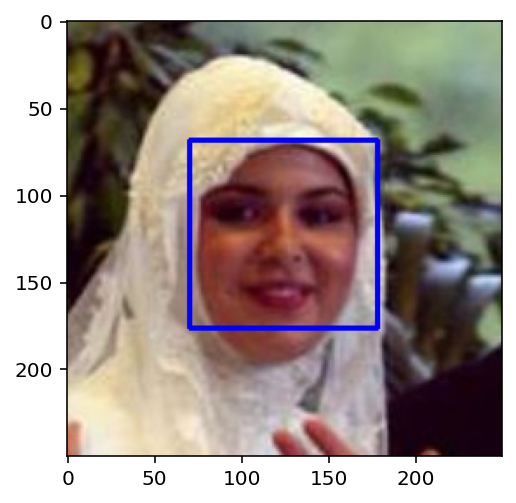

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# image에서 얼굴 detection 하는 XML 파일 적용
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# 색 (BGR) image 읽기 (경로를 받아서 image 읽기)
img = cv2.imread(human_files[0])

# BGR image 흑백 전환 (openCV haarcascade 적용을 위한 흑백 전환)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 읽은 흑백 image에 얼굴탐지 알고리즘 적용
faces = face_cascade.detectMultiScale(gray)


# image에서 인식한 얼굴의 수를 확인
print('Number of faces detected:', len(faces))

# 인식한 얼굴에 사각 영역 표시하기
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# 표출을 위해서 BGR image를 RGB로 전환하기
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()



* 일반적으로 얼굴인식 알고리즘은 흑백으로 image를 전환하여 수행합니다
* `detectMultiScale`함수는 `face_cascade`으로 받아온 얼굴인식 프로그램을 실행하며, 흑백 이미지를 input으로 받습니다

* 위에서 `faces`는 인식한 얼굴을 기록한 numpy array입니다
  * numpy array의 row는 각 인식한 얼굴의 좌표를 저장합니다
  * 첫 2개 좌표는 (위에서 `x`와 `y`로 받은) 인식한 얼굴의 왼쪽 위 꼭지점의 좌표를
  * 뒤 2개 좌표는 (위에서 `w`와 `h`로 받은) 인식한 얼굴의 넓이와 높이를 말해줍니다 (pixel 수)
  
  
## **[문제 1]** 얼굴 인식 모듈

위에서 사용된 코드로 직접 얼굴 인식 모듈을 구현하세요.

* function name : `face_detector`
  * input: `img_path`
    * `img_path` : image가 저장되어 있는 경로 string
  * output: `boolean`
    * 사람 얼굴이 인식되었으면 `True` 
    * 사람 얼굴이 인식되지 않았으면 `False` 
    * [힌트] `face_cascade`의 결과 값의 길이가 0보다 큰지 확인하는 함수 작성


**[답 작성]**

In [7]:
# 문제 1 답 작성
# img_path
print(faces)
print(face_cascade)

def face_detector(img_path):
  face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray)

  if len(faces) > 0:
    return True
  else:
     return False
    ### 답 작성 부분 ###

[[ 70  68 108 108]]
<CascadeClassifier 0x7ff0cdb93d50>


### 얼굴 인식 모듈 성능평가

아래 코드 셀에 위에서 작성한 `face_detector` 함수의 성능을 확인해보세요 (결과는 아래 코드에서 출력합니다).

1. 100개의 `human_files` image 중에서 사람얼굴을 인식한 경우는 몇% 인가요? 
2. 100개의 `dog_files` image 중에서 (잘못하여) 사람얼굴을 인식한 경우는 몇% 인가요?

물론 이상적으로는 human images에 대해서는 100% 와 dog images는 0%의 사람얼굴 인식 의 결과가 나와야 하지만, 본 알고리즘은 완벽하지 않다는 것을 확인할 수 있습니다.

아래 셀에서 각 항목별로 100개의 image를 추출하여 `human_files_short`와 `dog_files_short`로 준비하였습니다

In [8]:
human_files_short = human_files[:100]
print(human_files_short[:5])
dog_files_short = dog_files[:100]

## human_files_short와 dog_files_short에 face_detector algorithm의 성능을 확인하세요
human_file = [face_detector(file) for file in human_files_short]
dog_file = [face_detector(file) for file in dog_files_short]

human_percentage = human_file.count(True) / len(human_file) * 100
human_in_dog_percentange = dog_file.count(True) / len(dog_file) * 100

##################################################

print("human file에 대한 사람 얼굴인식률: {}%".format(human_percentage))
print("dog file에 대한 사람 얼굴 인식률: {}%".format(human_in_dog_percentange))

['images/lfw/Reyyan_Uzuner/Reyyan_Uzuner_0001.jpg'
 'images/lfw/Vicki_Zhao_Wei/Vicki_Zhao_Wei_0001.jpg'
 'images/lfw/Kieran_Prendergast/Kieran_Prendergast_0002.jpg'
 'images/lfw/Joshua_Gracin/Joshua_Gracin_0001.jpg'
 'images/lfw/Hugo_Chavez/Hugo_Chavez_0017.jpg']
human file에 대한 사람 얼굴인식률: 97.0%
dog file에 대한 사람 얼굴 인식률: 18.0%


---
<a id='step2'></a>
## Step 2: Detect Dogs

위에서 사람 얼굴 인식 모듈은 OpenCV를 통해서 구현했습니다.
이번에는 dog detection 관련 모듈을 pytorch에서 [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html)가져와서 구현하도록 합니다. Imagenet을 위한 구현 모델은 1000개의 class 분류를 하는데 있어서 dog의 종의 분류하는 class가 여러개 포함되어 있습니다!

### Pre-trained VGG-16 Model 불러오기

* 아래 코드는 [ImageNet](http://www.image-net.org/)의 방대한 자료를 통해서 미리 학습된 VGG-16 model 모델을 가져옵니다
* ImageNet에서 분류하는 [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)를 링크에서 확인해보세요  

In [9]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


* 아래 셀을 통해서 VGG16의 구조를 확인합니다.

In [10]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## **[문제 2]**  VGG-16 Model 에 대한 설명

위 VGG16 모델을 보고, 모델에 대해서 설명하세요 (아래 사항 중심으로). 
- input과 output의 구성과 관계 
- 최종 layer에서 출력하는 output의 의미
- output을 통해서 최종 class로 분류하는 방법 설명 [0~999]

**[답 작성]** 
VGG16 모델은 크게 2가지로 나뉘어저 있다. 앞부분인 Convolutional Neural Networks(CNN)와 뒷 부분인 Fully Conneted layer 로 나뉜다. 먼저 앞부분인 CNN은 image를 input으로 받을 때 유용한 네트워크로 더 복잡한 특징이 있을 때 주로 사용하는 네트워크이다. CNN의 형태는 13개의 convolutional layer 로 되어있고 초기conv2d는 3개의 채널을 64개의 채널로 늘려준다. 이때 크기변형이 일어나지 않도록 (N-F)/stride + 1 공식을 이용해 알맞는 padding과 필터,stride를 찾아준다. padding 은 크기를 유지하게 해주며, stride는 해상도를 조절하게 해준다. 또한 Maxpooling을 이용해 영향력이 큰 값들만 빼준다. 여기서 Maxpooling은 픽셀수를 줄이는 것으로 채널수는 유지하되 파라미터수를 감소시킴으로써 데이터 사이즈를 줄여 연산속도를 높여준다. 각각에 Relu 를 적용시켜 학습률을 높여준다. Relu는 기울기가 0이 되는 포화영역을 반으로 줄인 함수로써 sigmod보다 좋은 성능을 가진다. 최종적으로 Convolution layer는 3개의 채널을 512개의 채널로 늘려 특징을 추출한 후 다음 부분인 Conneted layer로 벡터7*7*512(채널수)의 형태로 넘겨준다. 여기서 사진의 크기를 알 수 있다. maxpooling 이 5번 일어났으므로 7 -> 14 -> 28 -> 56 -> 112 -> 224 이다. conneted layer는 추출한 특징을 확률로 변경시켜주는 역할을 한다. dropout은 중간을 랜덤하게 끊어 각각의 중요도를 분산시키는 역할을 한다(어느 한가지 특징만 중요하지 않게 하기 위해서). 최종적으로 3번의 Linear를 지나 1000개의 output이 나오며 이것은 각각 1000개의 클래스에 대한 예측 확률값이라고 할 수 있다.

## **[문제 3]** Pre-trained Model(VGG-16)을 활용한 개 품종 분류기

아래 셀에서 다음을 구현하세요:

* function name : `VGG16_predict`
    * input : `img_path`
        * `img_path` : image가 저장되어 있는 경로 string
        * 예) `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`

    * output : `index`
        * VGG16 모델을 통해서 분류된 ImageNet class index
        * VGG16의 분류 인덱스는 0에서 999 사이 입니다

* gpu를 활용하세요.

* VGG16 모델의 최종 출력 layer이 `linear` layer이라는 것을 인지해주세요 (logit 출력, 즉 softmax activation이 없는 채로 출력합니다!)

* 입력 image를 244x244 크기로 하세요 (transform, Resize)

* [중요] 아래 제공하는 `image_loader` 함수가 유용할 것입니다

* [힌트] 그 아래 `VGG16` 출력값 확인 과정을 나열하였습니다

### Image loader 함수 제공

* img_path에서 img를 어떻게 받는지 살펴보세요. 유용할 수 있습니다

본 문제에서는 VGG-16 모델을 개 인식 모듈의 네트워크로 사용하지만, 다른 Pre-trained 네트워크(예: [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3) 등)를 자유롭게 사용하여 프로젝트를 진행할 수 있습니다. 만약 다른 Pre-trained 네트워크로 개 인식 모듈을 구현하기로 한 경우 아래 vgg16에 해당하는 설명을 본인이 선택한 모델로 변경하여 설명하시면 됩니다

In [11]:
def image_loader(img_path, transform, use_cuda):
    image = Image.open(img_path).convert('RGB')
    img = transform(image)[:3,:,:].unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    return img

__[사용법]__

In [12]:
imgFile = 'images/dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'

transform = transforms.Compose([
                    transforms.Resize(size=(244, 244)),
                    transforms.ToTensor()])

img = image_loader(imgFile, transform, use_cuda)
img

tensor([[[[0.3216, 0.1490, 0.3098,  ..., 0.1843, 0.1216, 0.2078],
          [0.3608, 0.2431, 0.1961,  ..., 0.1020, 0.1137, 0.2353],
          [0.3804, 0.3961, 0.2549,  ..., 0.0980, 0.1608, 0.2588],
          ...,
          [0.9059, 0.8902, 0.8588,  ..., 0.8941, 0.8745, 0.8549],
          [0.9294, 0.9059, 0.8667,  ..., 0.8392, 0.8863, 0.8706],
          [0.9255, 0.9020, 0.8784,  ..., 0.7569, 0.8431, 0.8275]],

         [[0.3647, 0.1961, 0.3608,  ..., 0.2235, 0.1294, 0.1961],
          [0.4118, 0.2980, 0.2510,  ..., 0.1451, 0.1294, 0.2314],
          [0.4392, 0.4588, 0.3216,  ..., 0.1451, 0.1804, 0.2549],
          ...,
          [0.7373, 0.7216, 0.7059,  ..., 0.7961, 0.7843, 0.7725],
          [0.7569, 0.7373, 0.7137,  ..., 0.7412, 0.8039, 0.7922],
          [0.7529, 0.7333, 0.7216,  ..., 0.6627, 0.7569, 0.7490]],

         [[0.2039, 0.0824, 0.2196,  ..., 0.1961, 0.0941, 0.1451],
          [0.2627, 0.1529, 0.1098,  ..., 0.1137, 0.0863, 0.1725],
          [0.3020, 0.3176, 0.1725,  ..., 0

__[유용한 연습코드]__  VGG16(img)의 출력값 확인 과정

In [13]:
logit = VGG16(img)

In [14]:
logit.shape

torch.Size([1, 1000])

In [15]:
torch.max(logit,1)

torch.return_types.max(values=tensor([18.9550], device='cuda:0', grad_fn=<MaxBackward0>), indices=tensor([252], device='cuda:0'))

In [16]:
torch.max(logit,1)[1]

tensor([252], device='cuda:0')

In [17]:
torch.max(logit,1)[1].item()

252

In [18]:
index = torch.max(logit, 1)[1].item()
index

252

VGG16_predict를 완성하세요

In [19]:
# 문제 3 답 작성
def VGG16_predict(img_path):
    ### 답 작성 부분 ###
    transform = transforms.Compose([
                    transforms.Resize(size=(244, 244)),
                    transforms.ToTensor()])
    img = image_loader(imgFile, transform, use_cuda)
    logit = VGG16(img)
    index = torch.max(logit, 1)[1].item()

    return index

아래의 코드를 통해 위에서 구현한 함수를 테스트해 보세요.

예제 출력
```
Index: 252
```

In [20]:
imgFile = 'images/dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'
# imgFile = 'images/lfw/Patty_Duke/Patty_Duke_0001.jpg'

print("Index:", VGG16_predict(imgFile))

Index: 252


## **[문제 4]** 개 인식 모듈 제작

__Dog detector (개 인식)__<br>
위 VGG-16 에서 분류하는 [class](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)를 살펴보면<br>
151 - 268번은 `'Chihuahua'`에서 `'Mexican hairless'`까지 개의 종을 분류하는 인덱스라는 것을 알 수 있습니다.<br>
이외에 인덱스는 다양한 다른 종을 분류합니다.<br>
> 예를 들어서 1번은 '금붕어' 2번은 '백상아리' 등이죠.<br>

위 분류는 ImageNet에 분류 기준이어서 Vgg-16 뿐 아니라 Resnet등도 모두 같은 분류 기준을 사용합니다.

따라서, dog detector 모듈의 경우<br>
VGG16을 통해서 분류(`VGG16_predict(img_path)`)된 우리의 image가 151에서 268번 사이에 들어가는지<br>
`True`와 `False`를 알려주는 간단한 모듈을 만들면 됩니다.<br>

위의 방법이 말이 되는지 생각해보세요, 다른 방법이 있다면 다른 방법으로 구현해도 좋습니다.

* function name : `dog_detector`
    * input : `img_path`
        * `img_path` : image가 저장되어 있는 경로 string
        
    * output : `boolean`
        * 개가 인식되면 `True`
        * 아니면 `False`

**[답 작성]**

In [21]:
# 문제 4 답 작성
def dog_detector(img_path):
    ### 답 작성 부분 ###
    transform = transforms.Compose([
                    transforms.Resize(size=(244, 244)),
                    transforms.ToTensor()])
    img = image_loader(img_path, transform, use_cuda)
    logit = VGG16(img)
    index = torch.max(logit, 1)[1].item()

    if index >= 151 and index <= 268:
      return True
    else:
      return False
    # return result

### 개 인식 모듈 평가

아래 코드 셀에 위에서 작성한 `dog_detector` 함수의 성능을 확인해보세요.

- `human_files_short` image 중에서 (잘못하여) 개를 인식한 경우는 몇% 인가요?
- `dog_files_short` image 중에서 개를 인식한 경우는 몇% 인가요?

output 예제
```
human file에 대한 개인식률: 1.0%
dog file에 대한 개인식률: 95.0%
```

In [22]:
# human_files_short = human_files[:100]
human_dogs = [dog_detector(i) for i in human_files_short]
dogs = [dog_detector(j) for j in dog_files_short]

human = str(float(sum(human_dogs)) / len(human_files_short) * 100)
dog = str(float(sum(dogs)) / len(dog_files_short) * 100)

##################################################

print("human file에 대한 개인식률: {}%".format(human))
print("dog file에 대한 개인식률: {}%".format(dog))


human file에 대한 개인식률: 0.0%
dog file에 대한 개인식률: 96.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

앞의 Step1, 2를 통해 이미지에서 사람과 개를 인식하는 모듈을 구현하였습니다.<br>
이번 Step에서는 개의 이미지에서 개의 종을 예측할 수 있는 모듈을 구현할 것입니다.<br>
따라서, 개 품종을 분류하는 CNN을 만들고, 이 과정은 네트워크를 처음부터 각자 코드로 작성하여 네트워크를 구성하도록 합니다.<br>
최종 테스트 정확도는 10 % 이상을 권장합니다.<br>
(해당 프로젝트의 Step 4 에서는 Pre-trianed 네트워크를 이용해 transfer learning을 통하여 정확도를 크게 향상시키는 CNN도 만들 것입니다.)

참고로, 개 이미지에서 개에 품종을 예측하는 좋은 성능의 네트워크를 처음부터 끝까지 구성하는 일은 쉽지 않습니다 (코딩이 어려운 것이 아니라, 네트워크를 학습시키기 쉽지 않습니다).<br>
심지어 사람조차도 Brittany와 Welsh Springer Spaniel를 구별하는데 어렵기 때문이죠.

Brittany | Welsh Springer Spaniel
- | - 
<img src="https://drive.google.com/uc?export=view&id=1EFcAIA_vjVdQZQ3C6RaHi0FbrP5VusN7" width="100"> | <img src="https://drive.google.com/uc?export=view&id=1EXu-8pgzBxQoRu42CdZcmOYcZU1k1ysq" width="200">

클래스 간 차이가 별로 없는 아래와 같은 예도 있습니다 (예 : Curly-Coated Retrievers 및 American Water Spaniels).

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="https://drive.google.com/uc?export=view&id=15VG_cj-L-HN_ysipi-Q4s_4j5dcqbuyf" width="200"> | <img src="https://drive.google.com/uc?export=view&id=1fcLLK6x2_bZN8_17O9SDYBE80jIA-4Qp" width="200">


어려움에 대한 예로, 모두 labradors 품종인데 yellow, chocolate, 및 black 으로 다양한 털 색이 있는 종도 있습니다. 모두 같은 품종으로 예측해야하는 어려운 문제죠.

Yellow Labrador | Chocolate Labrador | Black Labrador
- | - | -
<img src="https://drive.google.com/uc?export=view&id=171DW8SsBtFvjy-TQqyZOpne1y3_6g-lf" width="150"> | <img src="https://drive.google.com/uc?export=view&id=1bBvcQTyeC6umNeX3jpqXes52eqXGFAmm" width="240"> | <img src="https://drive.google.com/uc?export=view&id=18er4UGbiTtuDoHwjNrv8AEqLeJafnkLg" width="220">



## **[문제 5]** Dataset 에 대한 Data Loaders 구성

아래의 코드를 사용하여 개 이미지의 training, validation, 및 test data set (각각 `images/dogImages/train`, `images/dogImages/valid`, `images/dogImages/test`에 위치)에 대해 각 [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)를 작성하십시오.<br>
수업에서 참고했던 [torchvision datasets](http://pytorch.org/docs/stable/torchvision/datasets.html)를 참고할 수 있습니다.<br>
training/validation 성능을 개선하기 위해서 다양한 [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)을 활용하실 수 있습니다. <br>

__[코드 구성]__
- - -
* MEANS, DEVIATIONS
    * transform에서 정규화에 사용할 평균 및 표준편차 값 설정
    * MEANS: RGB 평균 
    * DEVIATIONS: RGB 표준편차 
- - -
* 데이터 위치
    * train_path : `images/dogImages/train`
    * valid_path : `images/dogImages/valid`
    * test_path : `images/dogImages/test`
- - -
* Transform
    * `train_transform` : train 에 사용될 Transform
    * `test_transform` : validation, test 에 사용될 Transform
- - -
* ImageFolder
    * `training` : training에 사용될 이미지 폴더의 데이터 셋
    * `validation` : validation에 사용될 이미지 폴더의 데이터 셋
    * `testing` : testing에 사용될 이미지 폴더의 데이터 셋
- - -
* DataLoader & DataLoader Dictionary
    * `train_batches` : training 데이터 셋의 데이터 로더
    * `valid_batches` : validation 데이터 셋의 데이터 로더
    * `test_batches` : testing 데이터 셋의 데이터 로더



**[답 작성]**

In [30]:
# np.mean(224*224,axis=0)

In [15]:
newpath = Path("images/dogImages").expanduser()#강아지 이미지까지 경로를 쉽게 쓰기 위해서 만든 변수
train_path = str(newpath.joinpath("train"))#강아지 이미지에 안에 있는 train data에 대한 경로지정
valid_path = str(newpath.joinpath("valid"))#강아지 이미지에 안에 있는 valid data에 대한 경로지정
test_path = str(newpath.joinpath("test"))#강아지 이미지에 안에 있는 test data에 대한 경로지정

IMAGE_SIZE = 224#이미지의 크기를 224로 한다. 

# 문제 5 답 작성
#mean (평균)= 기울기를 0에 가까워지도록 RGB 채널별로 바꿔준다.
MEANS = [0.485, 0.456, 0.406]
#var (분산)= 펴저있는 데이터들을 0에 수렴하도록 RGB 채널별로 적용해준다.
DEVIATIONS = [0.229, 0.224, 0.225]

# transforms
#이미지 가져올때 이미지의 형태를 지정해 주는 것으로, 사용자가 원하는 형태로 변형해서 가져올 수 있다. 
#randomRotation과 resizecrop, HorizonralFlip등으로 데이터의 다양성을 늘려 학습할 수 있게 해준다, -> 데이터 없을 때 사용
train_transform = transforms.Compose([
                                      #  transforms.RandomRotation(30),##랜덤하게 사진을 30도 돌림
                                      #  transforms.RandomResizedCrop(IMAGE_SIZE),#랜덤하게 확대 또는 축수 해서 224로자름
                                      #  transforms.RandomHorizontalFlip(),#랜덤하게 flip(미러-> 거울에 비친거)하는 과정
                                       transforms.Resize(IMAGE_SIZE),#사진의 크기를 224*224 로 바꿔준다.
                                       transforms.CenterCrop(IMAGE_SIZE),#가운데를 중심으로 224로 확대,축소 해준다. 
                                      #resize는 사진이 손실될 수 있고, centercorp은 사진이 손실되지 않는다. 
                                       transforms.ToTensor(),#이미지를 tensor형으로 바꿔서 가져옴
                                       transforms.Normalize(MEANS,DEVIATIONS)])#정규화 => mean = 0, 표준편차 =1 로 만드는 것
                                       #transforms.Normalize는 image의 값을 정규화하는 과정->성능을 개선하게 하는 중요한 단계이다. 없으면 거의 training 실패함


#학습이 잘됐는지 확인할때 사용하는 data 형태로, test와 valid 에 쓰인다. 사진의 크기를 맞추는것은 가능하지만 변형시키면 안된다.
test_transform = transforms.Compose([transforms.Resize(IMAGE_SIZE),
                                      transforms.CenterCrop(IMAGE_SIZE),#확대 축소
                                      transforms.ToTensor(),#tensor로 바꾸는 작업
                                      transforms.Normalize(MEANS,DEVIATIONS)])

# Image folder
#앞에서 정의했던 경로((train,valid,test)_path)가지고 transform에서 정의한 형태대로 이미지를 가져와서 저장한다.
training = datasets.ImageFolder(train_path, transform=train_transform)
validation = datasets.ImageFolder(valid_path, transform=test_transform)
testing = datasets.ImageFolder(test_path, transform=test_transform)#test와 같은형태의 데이터 써야함
# print(training[0]) -> 데이터 형태 어떻게 나오는지 확인
# print(training.classes)#->라벨 어떻게 나오는지 확인


# DataLoader
#32개의 그림을 한번에 받아서 trainloader에 저장한다.
#batch size = sample데이터 중 한번에 네트워크에 넘겨주는 데이터의 수
#만약 데이터가 1000개 있으면 20개씩 50개 그룹화(1 iteration = 20개의 데이터에 대해 학습)
#해서 1개 epoch 돔 (epoch = 3일때 ->전체 데이터를 3번에 걸처 학습)
#training이 잘 되지 않는다면 batch_size를 낮춰주면 된다.-> 32개로 하면 속도 더 빨라짐
train_batches = torch.utils.data.DataLoader(training, batch_size=32)#,shuffle = True -> 섞어서 가져옴
valid_batches = torch.utils.data.DataLoader(validation, batch_size=32)
test_batches = torch.utils.data.DataLoader(testing, batch_size=32)


## **[문제 6]** 데이터 전처리에 대한 설명

위 작성한 코드에 대해서 아래 내용을 설명하세요
- data의 구성과 각 dataloader의 역할을 설명하세요
- `ImageFolder`는 image data와 class label을 어떻게 불러오나요?
- 이미지의 size를 어떻게 조정하나요? (무엇을 이용해 크기를 조정하는지?)
- training을 위한 transform을 사용하였다면, 어떻게 /왜 사용하였나요? (normalization, 변형 등을 자세하게!)

**[답 작성]**
1. data 의 구성은 dogimages 파일 안에 test,train,valid 로 각각 나눠 저장되고 있다. 딥러닝의 궁극적인 목표는 새로운 데이터를 받아 분류할 수 있는지 없는지이다. 따라서 이것이 잘 이루어 지는지를 최종적으로 테스트 해야한다. 이때 사용하는 데이터가 test데이터로, train data와는 달리 자료를 변형해서는 안된다. train data는 목표를 이루기 위해 model을 학습할때 사용하는 data로 여러가지 변형을 통해 데이터의 갯수를 늘릴 수 있다. 마지막으로 valid data는 train data로 학습된 것들 중 가장 잘 학습된 data를 찾는것으로 데이터를 변형시켜서는 안된다.

2. imageFolder는 각각의 경로에 들어있는 data들을 transform의 형태로 바꿔서 가져온다. 따라서 224형태로 자른 이미지를 tenser형태로 바꿔서 저장한다. label은 '001.Affenpinscher'의 형태로 사진의 이름과 숫자로 저장된다. *.classes 로 확인할 수 있다.

3. 이미지의 size는 transform에서의 resize, centercrop 등으로 사용자가 원하는 크기로 변경할 수 있다. resize는 사진을 잘라서 가져오기 때문에 사진이 소실되는 반면, centercrop은 사진을 확대, 축소해서 가져오는 방법으로 사진의 손실이 없다. 

4. transform을 사용한 이유는 가져오는 사진의 크기가 다 다르고 편향된 사진이기 때문이다. 같은 형태의 크기로 맞춰줘야 벡터연산이 가능하고 정확히 나오게 된다. 
따라서 이 과정은 이미지 통일성을 주기 위한 과정이다.  먼저 resize로 사진을 잘라서 가져오고, centercrop 해준다. 그다음 데이터를 벡터연산하기 위한 tensor 형태로 변형해주고, nomalize를 통해 RGB채널별로 정규화 시켜준다. 정규화란 데이터의 범위를 사용자가 원하는 범위로 제한하는 것으로, mean을 빼는 작업은 data를 0을 중심으로 두는 변형을 하고, std를 나누는 것은 값들을 -1에서 1사이로 좁히는 작업을 수행하는 것이다. 




## **[문제 7]** 개 품종 분류 CNN 구성

개의 품종을 분류하는 CNN을 만드세요.<br>
구조는 학생마다 다르게 구성할 수 있는 부분입니다. 최대한 좋은 성능을 갖도록 구성해보세요<br>
`BREEDS`는 실제 training 시 나와야 하는 classes의 개수입니다.

In [16]:
# 문제 7 답 작성 : define the CNN architecture

BREEDS = len(training.classes)
print(BREEDS)
print(training.classes[1])

#네트워크에 값을 넣어서 model을 만든다. 네트워크의 init에는 파라미터(h와 W )가 자동으로 만들어지며 
#forward를 통해 relu와 softmax적용된 x가 나온다.
class Net(nn.Module):
    def __init__(self):
        ### 답 작성 부분 ###
        super(Net,self).__init__()

        #224*224*3의 이미지로 시작 -> 224 는 필터=3, padding=1 에서 크기 유지
        self.conv1 = nn.Conv2d(3,12,3,padding=1)#결과 = 112*112*12
        #앞에 3 = input채널 수 , 16 = output 채널 수 , 뒤에 3 = 필터 크기 , padding = zero pad로 edge를 0으로 채움.
        #padding 쓰는 이유 = 결과 이미지크기가 줄어들지 않게 하기 위해서
        #따라서 3개의 채널을 3*3의 필터 16개 적용해서 conv2를 만든다. 

        self.conv2 = nn.Conv2d(12,24,3,padding=1)#결과 = 56*56*24
        self.conv3 = nn.Conv2d(24,48,3,padding=1)#결과 = 28*28*48
        self.pool = nn.MaxPool2d(2,2)
        #maxpool = 가장 큰 값(영향력이 큰것만 빼준다)을 뽑아 채널을 놔두고 사이즈만 줄이는 방법
        self.fc1 = nn.Linear(48*28*28,15000)#37632,15000
        self.fc2 = nn.Linear(15000,7000)
        self.fc3 = nn.Linear(7000,113)
        self.dropout = nn.Dropout(0.2)

    
    def forward(self, x):
        ### 답 작성 부분 ###
        x = self.pool(F.relu(self.conv1(x)))#-> 결과값 = 112*112*12
        x = self.pool(F.relu(self.conv2(x)))#-> 결과값 = 56*56*24
        x = self.pool(F.relu(self.conv3(x)))#-> 결과값 = 28*28*48
        x = x.view(-1,48*28*28)#벡터형태로 바꿔줌
        x = self.dropout(x)
        # overfitting(trinning 데이터에 너무 학습이 되어서 test 데이터에서 결과가 작아지는 현상)
        # 을 막기위해몇개의 노드를 죽이고 남은 노드들을 통해서만 훈련을 하는 것
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.log_softmax(self.fc3(x),dim=1)
        # log_softmax = 확률을 분포로 나타내기 위해서

        return x




133
002.Afghan_hound


In [17]:
#  CNN instance 생성
model_scratch = Net()
print(model_scratch)
# GPU 활용
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=37632, out_features=15000, bias=True)
  (fc2): Linear(in_features=15000, out_features=7000, bias=True)
  (fc3): Linear(in_features=7000, out_features=113, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## **[문제 8]** 설계한 CNN 모델 설명

위의 코드와 같이 네트워크를 구성한 방법과 이유를 각 단계별로 설명하세요. 
아래 내용도 포함하여 설명하시고, 이외에 중요하다고 생각하는 모든 설명을 하시면 됩니다.

* 차원 분석, 채널 수, 커널 크기, linear layer neuron 수
* activation function과 선정 이유
* 특별히, 최종 layer에서 사용한 activation function이 무엇인지 왜 사용하였는지를 상세 설명 
* CNN 모델이 무엇을 입력받고 출력하나요?
  * input과 출력의 관계
  * Output 값의 의미

**[답 작성]** 
1. 차원분석에서 fiter크기와 padding 적용한 이유는 다음으로 넘어갈 때 이미지의 크기를 보존하기 위해서 입니다. (N-F)/stride + 1 의 공식을 이용해[(226 (paddig=1이기때문에 2더해줌) - 3(필터크기))/stride(1) + 1 ]= 224 가 나오는 것을 확인하였습니다. maxpooling은 사이즈를 줄이기 위한 것으로 채널수는 그대로 두며 파라미터 수만 감소시킵니다. 영향력이 큰 값들만 나오기 때문에 학습에 도움이 됩니다. linear layer 수는 3개로 하였습니다. 왜냐하면 늘리면 늘릴수록 시간도 많이걸리고 연산 복잡도가 올라가 overfitting이 일어날 수 있기 때문입니다. overfiting을 줄이기위해 dropout을 사용하였습니다. dropout이란, 중간에 랜덤하게 activation 들을 끊어 성능을 높이는 것으로, 각각의 중요도를 분산시켜 어느 한 가지 특징만 중요하지 않게 만들어 줍니다. 

2. activation funtion은 relu를 사용하였습니다. relu는 0 이하 영역의 기울기를 0으로 만든 active 함수로 포화영역을 1개(음수부분)로 줄인 함수입니다. gradient(기울기가 0과 비슷한 부분 = 포화영역)가 많으면 학습이 잘 되지 않기 때문에 sigmoid(포화영역이 2두군데) 보다 학습이 잘되서 relu를 선택하였습니다. 

3. 최종 layer에서는 softmax를 사용하였습니다. softmax는 출력값들을 정규화해주는 함수로, 확률 분포로 나타나게 됩니다.  exp연산으로 작은값은 더 작게, 큰값은 더 크게 만들어 주게 됩니다.따라서 softmax의 합은 언제나 1이되고 결과를 분류할때 더 좋은 분류를 할 수 있도록 도와주는 함수입니다.

4. output의 크기는 133으로 하였습니다. 왜냐하면 분류할 강아지 종의 수가 133종으로 train안에는 133종의 파일이 있기 때문입니다. 파일 안에는 강아지 사진들이 총 8351장이 들어있습니다. CNN모델은 복잡한 특징이 있을때 사용하는 모델로,우리 뇌와 비슷한 형태로 동작하게 됩니다. 여러개의 필터 적용하여 어떤 필터 사용했을 때 최대로 활성화 되는지 찾아줍니다.  input으로 image를 받습니다. 입력된 image는 각 이미지에서 특정 특징을 활성화하는 convolutional layer 필터 집합을 통과합니다.통과 하면서 relu를 만나게 됩니다. relu는 음수 값을 0에 매핑하고 양수 값을 유지하여 더 빠르고 효과적인 학습을 가능하게 합니다. 이때 활성화된 특징만 다음 계층으로 전달됩니다.pooling은 네트워크에서 학습해야 하는 매개 변수 수를 줄여서 출력을 간소화합니다. 이렇게 출력된 out은 fully conneted 함수로 특징들을 전달해 줍니다. 




## **[문제 9]** Cost (Loss) Function 과 Optimizer 선택

[loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) 및 [optimizer](http://pytorch.org/docs/stable/optim.html)를 선택하여 코드를 완성하세요. 선택한 cost function을 `criterion_scratch`로 저장하고 optimizer를 아래 `optimizer_scratch`로 저장하세요.

Optimizer와 Cost 함수를 선정하는데 중요하다고 생각하는 내용을 모두 작성합니다. 
아래 내용은 최소한 포함하여 설명합니다.

* Optimizer는 무엇을 선정하였는지 설명
* Cost (loss) function을 무엇으로 선택하고, 왜 선택하였는지 설명
  * Cost function이 본 문제에 왜 사용하였는가?
  * 분류 문제에서 사용하는 cost 함수의 의미를 설명하세요

**[답 작성]**

In [19]:
# 문제 9 답 작성: loss function and optimizer
criterion_scratch = nn.NLLLoss()#NLLLoss()쓴다. ->negative log likelihood loss
optimizer_scratch = optimizer.Adam(model_scratch.parameters(), lr=0.1,weight_decay=1e-7)#무엇을 최적화 할 것인지 써주는것

# optimizer_scratch = optimizer.Adam(model_scratch.parameters(), lr=0.017)#무엇을 최적화 할 것인지 써주는것


**[답 작성]**
1. optimizer로는 adam을 선택했습니다. optimizer 종류에는 adam,SGD, SGD-Momentum 등이 있습니다. adam은 momentum 과 RMSProp 합한것으로, momentum은 과거 gradient의 방향을 계속 곱해주는 것이고, RMSProp은 AdaGrad 를 개선한 것입니다. 따라서 Adam은 관성을 이용해 덜 비틀거리게 함과 동시에 상황을 봐가면서 세밀하게 학습하여 최적값에 더 부드럽게 가까워지게 합니다. optimizer의 파라미터로는 learning rate과 weight_decay를 설정했습니다. lr은 학습비율을 뜻하며 적절한 크기를 잡는것이 중요합니다. 너무 크게 잡는다면 더이상 성능이 좋아지지 않아 최저값을 못찾을 것이고, 너무 작게 잡는다면 시간이 많이 걸리고 overfiting이 일어날 수 있다. 따라서 최적점에서 멀리 있을 때는 lr을 크게 하고, 점차 최소점에 나아갈수록 lr을 작게 만드는 것이 좋습니다.이때 사용하는 것이 weight_decay로,  weight_decay는 lr이 평평해지면(학습이 잘 안되면) lr을 떨어뜨립니다.이 기능을 사용해 더 빠르게 최적점을 찾아갈 수 있게 합니다. 초기에는 값을 크게 가게 하고, 평평해지면 lr비율을 떨어뜨려 최적점을 더 잘 찾게 해줍니다.

2. loss function 은 손실함수로써, model이 data를 얼마나 잘 처리하는지에 대한 것을 나타내주는 함수이다. NLLLoss를 사용한 이유는 네트워크를 만들 때 log_softmax를 해줌으로써 나중에 연산을 편하게 하기 위해서 사용한다. 

## **[문제 10]** 구성한 모델에 대한 Train and Validate 진행

위에서 구성한 모델을 `Train and validate` 하는 모듈을 작성합니다.<br>
[최종 training된 parameter들을](http://pytorch.org/docs/master/notes/serialization.html) 파일 경로 `'models/model_scratch.pt'`에 저장하는 코드를 작성합니다.

`Train and validate` 전에 train 이라는 함수를 작성하여 `Train and validate`를 진행하세요. 가능하면 training되는 과정을 출력하도록 하세요:

예제:
```
Started Training...
Epoch: 1 	Training Loss: 3.317162 	Validation Loss: 4.162958
Validation loss decreased (inf --> 4.162958).  Saving model ...
Epoch: 2 	Training Loss: 2.420140 	Validation Loss: 4.182362
Finished training
<All keys matched successfully>

```


* 코드 전체를 주석으로 설명하세요
* function name : train
    * input : `n_epochs`, `train_batches`, `valid_batches`, `model`, `optimizer`, `criterion`, `use_cuda`, `save_path`
        * `n_epochs` : epochs 의 수 
        * `train_batches` : training data loader
        * `valid_batches` : validation data loader
        * `model` : 구성한 모델
        * `optimizer` : 선택한 optimizer
        * `criterion` : 선택한 loss function
        * `use_cuda` : 쿠다 사용 여부
        * `save_path` : 학습된 모델을 저장할 위치
        
    * output : `model`, `train_losses`, `valid_losses`
        * `model`: 학습이 완료된 모델을 반환
        * `train_losses`, `valid_losses`: epoch 별 training loss와 validation loss (자료형 list)
* 본 과정을 설명하는데 필요하다고 생각하는 추가 `output` 이 있다면, `output` 종류를 더 만드셔도 좋습니다
        

**[답 작성]**

In [74]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
# 문제 10 답 작성

def train(epochs, train_loader, valid_loader, model, optimizer, criterion, use_cuda, save_path):
    ### 답 작성 부분 ###

    validation_losses_min = np.Inf # 무한대를 표현하기 위해서 np.inf사용

    for e in range(epochs):

      train_losses = 0
      valid_losses = 0

      model_scratch.train()

      # for images, labels in train_batches:

      for idx, (images, labels) in enumerate(train_batches):
        if idx == 2:
          break

          #앞의 model.to와 같이 input값과 label 값들도 gpu로 계산하기 위해서 cuda형식으로 바꿔서 계산
          #GPU를 쓰기위해 data 와 target을 cuda형식으로 바꿔줌
          if use_cuda:
            images, labels = images.cuda(), labels.cuda()
          optimizer_scratch.zero_grad()#여기서 다시 grad 켜준다.
          log_ps = model_scratch(images)
          loss = criterion_scratch(log_ps, labels)#앞 네트워크에서 작업한 self와 x 의 인수로 들어감
          loss.backward()
          #update하는 과정, 파라미터 바꿔줌
          optimizer_scratch.step()

          train_losses += loss.item()*images.size(0)
          #data.size 곱해주는 이유 = loss.item은 전체 데이터 셋을 나눈 값이기 때문에 나중에 평균 내려면
    
      #validation 값들을 출력해줄 변수
      accuracy = 0
      # Gradient를 계산할 필요 없으니 비활성화
      # with torch.no_grad():

      #validation 과정에서는 dropout을 비활성화 ->droupout 확률이 0으로 동작
      model_scratch.eval()#꺼주고->#validation 학습 안하게 함
      #traing 다 끝나고 돌린다. validation 하는 부분
      for images, labels in valid_batches:
        if use_cuda:
          images, labels = images.cuda(), labels.cuda()
        log_ps = model_scratch(images)
        loss = criterion_scratch(log_ps, labels)
        valid_losses += loss.item()*images.size(0)
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1,dim=1)

        equals = top_class == labels.view(*top_class.shape)

        accuracy += torch.mean(equals.type(torch.FloatTensor))

      train_losses = train_losses/len(train_batches)
      valid_losses = valid_losses/len(valid_batches)

      print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(e, train_losses, valid_losses))
      if valid_losses <= validation_losses_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(validation_losses_min, valid_losses))
        torch.save(model.state_dict(), save_path)#model_scratch.pt 의 이름으로 저장해라
        #이전단계와 계속 비교해야 하니까 최소값을 저장된 validation(더낮은)것으로 저장해줌
        validation_losses_min = valid_losses


    return model_scratch, train_losses, valid_losses

In [75]:
# 아래 코드 줄은 자른 이미지에 대해서 동작하도록 설정하는 부분이며, 주어지는 코드로 사용하세요
# PIL image가 truncated 된 경우 사용할 수 있도록 설정
ImageFile.LOAD_TRUNCATED_IMAGES = True

epochs = 10
model_path = Path("models").expanduser()
save_path = model_path.joinpath("model_scratch.pt")

# model_scratch 학습하기
model_scratch, train_losses, valid_losses = train(epochs, train_batches, valid_batches, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, save_path)

# validation이 가장 좋았던 모델 parameter 불러와서 저장하기
model_scratch.load_state_dict(torch.load(save_path))

Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 145.487194
Validation loss decreased (inf --> 145.487194).  Saving model ...
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 145.487269
Epoch: 2 	Training Loss: 0.000000 	Validation Loss: 145.660618
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 145.660618
Epoch: 4 	Training Loss: 0.000000 	Validation Loss: 145.487269
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 145.487269
Epoch: 6 	Training Loss: 0.000000 	Validation Loss: 145.660618
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 145.660618
Epoch: 8 	Training Loss: 0.000000 	Validation Loss: 145.487269
Epoch: 9 	Training Loss: 0.000000 	Validation Loss: 145.487269


<All keys matched successfully>

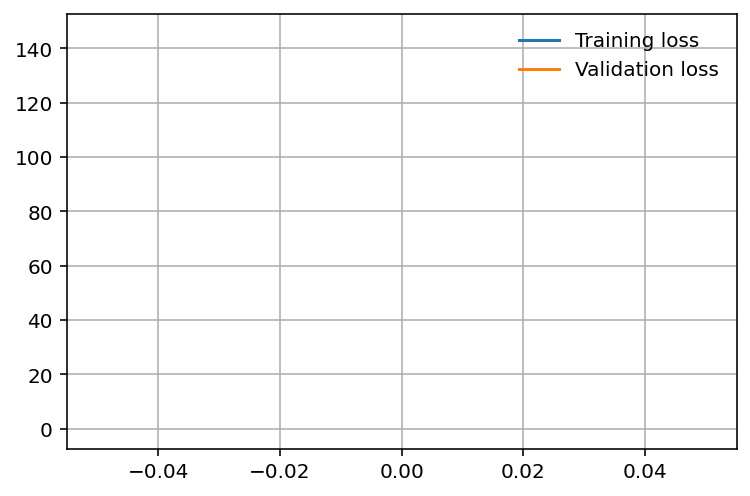

In [76]:
# 성능 분석에 활용하기 위한 결과 plot 하는 방법
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)

plt.grid(True)

## **[문제 11]** CNN model training/validation 분석

* 위에서 수행한 training + validation 과정을 설명하세요
* validation 과정을 분석하고, 학습을 개선시킨 방법을 validation 결과와 함께 분석하세요

  * tranining loss와 validation loss 그래프를 통해서 분석
  * hyper-parameter, model을 변경하면서 성능 개선한 과정을 최대한 설명하세요
  * dropout, regularization, normalizationearly stopping 등 사용한 방법 설명
  * overfitting, underfitting 분석

**[답 작성]**
1. 만약 validation 그래프가 train 데이터와 비슷하다면 underfiting된 것으로 학습을 더해 성능이 좋아질 수 있다는 것을 말한다. valid 그래프가 train 그래프에 비해 계속해서 줄어들고 있다면 그건 overfitting 난 것으로 정규화나 dropout,regularzation으로 극복해 나가야 한다.

2. 성능을 개선하기 위해서 normalize하는 부분의 mean값과 var 부분을 변경하였다. dropout을 이용해 데이터가 overfiting 되는 것을 방지했다. 데이터의 양을 늘리기 위해서 transform 부분의 데이터 형태들을 랜덤하게 rotation, resizecrop 해주었다.lr를 조절하여 overfiting을 방지하였다.batch_size를 줄여 더 많은 학습을 가능하게 했다. 

3. dropout은 중간에 랜덤하게 activation 들을 끊어 성능을 높이는 것이다. 각각의 중요도를 분산시켜 어느 한 가지 특징만 중요하지 않게 만든다. regularization은 overfiting을 막기위한 것으로 lr을 조정하여 관성법칙(과거 gradient를 곱해주는 것)더 부드럽고 빨리 최적값에 가까워지게 한다. 최적화 하기 위해서 backword를 이용했다. gradient 구하기 위해 사용하는 것으로 backpropagation 과정이 함축되 있다. 계속 기울기 줄여서 최소되는 기울기 찾는 과정으로, 뒤에서 앞으로 계산해 나간다. (앞단계에서 흘러들어온 미분 값) * (로컬 미분값) 대개 forward pass 계산될 때 backward 도 함께 수행되서 저장된다. 연산을 빠르게 하기 위해서 gpu에 올려 연산을 수행하였다. 

4. overfitting이란 train data(내가 제공한 데이타)에 너무 타이트하게 학습된것을 말한다. underfiting은 데이터 부족으로 인해 발생하는 문제로 복잡도가 너무 낮아 데이터에 대해 학습이 잘 이루어지지 않은 것을 말한다. 

## **[문제 12]** 학습한 모델에 대한 Test 과정

위에서 학습한 모델을 이용하여 개 이미지의 test dataset에서의 예측결과를 확인하세요.<br>
test loss 와 test accuracy를 계산하고 출력하세요.<br>
test accuracy를 확인합니다 (9%이상 목표로 해보세요).<br>

`test` 전에 test라는 함수를 작성하여 `test`를 진행하세요.
* test 결과가 출력되도록 작성합니다

* function name : test
    * input : `test_batches`, `model`, `criterion`, `use_cuda`
        * `test_batches` : test dataset loader
        * `model` : 학습된 모델
        * `criterion` : 선택한 loss function
        * `use_cuda` : 쿠다 사용 여부
        
    * output : 없음.


Test 모듈 실행 결과 예시
```
Test Loss: 3.924572


Test Accuracy: 11% (98/836)
```

In [77]:
# 문제 12 답 작성

# print(training.classes[1])
def test(test_loader, model, criterion, use_cuda):

    ### 답 작성 부분 ###

    test_loss = 0.0
    class_correct = list(0. for i in range(133))#133개의 0으로 된 list 만듬
    class_total = list(0. for i in range(133))

    model_scratch.eval()#test 여서 학습 안하게 함

    for images, labels in test_batches:

        if use_cuda:
            images, labels = images.cuda(), labels.cuda()
        

        output = model(images)
        loss = criterion_scratch(output, labels)
        test_loss += loss.item()*images.size(0)
    
        #이중에서 확률이 가장 높은 것을 pred에다가 넣어줘라. ->1차원으로 봐야함
        _, pred = torch.max(output, 1)
    
        #pred와 같은지 비교하는 부분 -> labels date의 형태를 pred 와 같이 변경시켜줘라
        correct_tensor = pred.eq(labels.data.view_as(pred))

        #만약 GPU가 아니면 그냥 numpy 해주고 GPU에서 사용했으면 cpu로 넘겨줘서 numpy 해줘라
        #numpy 연산은 gpu에서 안되기 때문에 cpu로 넘겨주는 과정
        correct = np.squeeze(correct_tensor.numpy()) if not use_cuda else np.squeeze(correct_tensor.cpu().numpy())
    
        #몇개 맞췄는지 개산 
        for i in range(len(labels.data)):#라벨 데이터 갯수만큼 돌려줌
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1


    test_loss = test_loss/len(test_batches.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(133):
        if class_total[i] > 0:
            #몇개 틀리고 맞았는지 알려주는 과정
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                training.classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (training.classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [78]:
# call test function    
test(test_batches, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.699281

Test Accuracy of 001.Affenpinscher:  0% ( 0/ 8)
Test Accuracy of 002.Afghan_hound:  0% ( 0/ 8)
Test Accuracy of 003.Airedale_terrier:  0% ( 0/ 6)
Test Accuracy of 004.Akita:  0% ( 0/ 8)
Test Accuracy of 005.Alaskan_malamute: 20% ( 2/10)
Test Accuracy of 006.American_eskimo_dog:  0% ( 0/ 8)
Test Accuracy of 007.American_foxhound:  0% ( 0/ 7)
Test Accuracy of 008.American_staffordshire_terrier:  0% ( 0/ 8)
Test Accuracy of 009.American_water_spaniel:  0% ( 0/ 4)
Test Accuracy of 010.Anatolian_shepherd_dog:  0% ( 0/ 6)
Test Accuracy of 011.Australian_cattle_dog:  0% ( 0/ 9)
Test Accuracy of 012.Australian_shepherd:  0% ( 0/ 9)
Test Accuracy of 013.Australian_terrier:  0% ( 0/ 6)
Test Accuracy of 014.Basenji:  0% ( 0/ 9)
Test Accuracy of 015.Basset_hound:  0% ( 0/10)
Test Accuracy of 016.Beagle:  0% ( 0/ 8)
Test Accuracy of 017.Bearded_collie:  0% ( 0/ 8)
Test Accuracy of 018.Beauceron:  0% ( 0/ 7)
Test Accuracy of 019.Bedlington_terrier:  0% ( 0/ 6)
Test Accuracy of 0

---
<a id='step4'></a>
# Step 4: Transfer learning을 활용한 개 품종 분류 네트워크 구성

이제 transfer learning을 사용하여 이미지에서 개 품종을 식별 할 수있는 CNN을 만듭니다.<br>
CNN은 test set에서 60 % 이상의 정확도를 권장합니다.


## **[문제 13]** 개 품종 분류 CNN 구성

[transfer learning](https://pytorch.org/docs/0.3.0/torchvision/models.html#torchvision-models)을 사용하여 개 품종을 분류하는 CNN을 만들도록 하겠습니다.<br>
미리 학습된 모델을 사용하여 학습 시간을 줄이고 정확도를 높이며, 출력의 분류 layer들을 우리 목적에 맞게 변경하도록 합니다. (Transfer learning 실습 참고하세요).<br>
* Pretrained 된 모델을 변수 `model_transfer`로 저장하십시오.<br>
* `Torchvision`에서 Imagenet으로 학습된 모델을 위 링크에서 찾아서 다양하게 적용해보시고, 가장 적합하다고 판단되는 것을 선정해서 변경하시면 됩니다.
* 모델별로 다르겠지만, classification을 위한 Fully connected layer (FCN) 부분을 우리 분류 목적에 맞게 변경하기 위해서 FCN 부분의 입력 길이를 파악학고, 최종단의 출력을 우리 목적에 맞게 변경하시면 됩니다

* 우리 분류 개수는 위 `BREEDS`라는 자료에 저장되어 있습니다
* `pretrained=True` 설정을 잊지 마세요

In [24]:
BREEDS

133

**[답 작성]**

In [64]:
# 문제 13 답 작성 : Pretrained 모델을 불러오세요.
model_transfer = models.densenet161(pretrained=True)

불러온 모델의 구조를 확인합니다

In [65]:
model_transfer

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

Transfer learning을 위해서 133개의 class로 분류하는 FCN을 불러온 model_transfer 에 맞게 적용 하세요.

* Feature extraction (CNN) 부분은 재학습하지 않습니다 (parameter 동결)
* 새로 구성한 FCN 부분을 재 학습 할 수 있도록 gradient 연산을 살려둡니다 

**[답 작성]**

In [66]:
## 문제 13 코드 답 작성
### 답 작성 부분 ###
train_transforms = transforms.Compose([
                                       transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                      #  transforms.RandomRotation(30),
                                      #  transforms.RandomResizedCrop(224),
                                      #  transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
training = datasets.ImageFolder(train_path, transform=train_transforms)
testing = datasets.ImageFolder(test_path, transform=test_transform)#test와 같은형태의 데이터 써야함

train_batches = torch.utils.data.DataLoader(training, batch_size=10)#,shuffle = True -> 섞어서 가져옴
test_batches = torch.utils.data.DataLoader(testing, batch_size=10)

# Backprop을 수행하지 않도록 parameter들을 동결시킴
for param in model_transfer.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2208, 1000)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(1000, 133)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model_transfer.classifier = classifier

####
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model_transfer.to(device)

if use_cuda:
    model_transfer = model_transfer.cuda()
model_transfer

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

## **[문제 14]** 위의 네트워크를 구성한 이유에 대한 설명

Transfer learning을 위해서 설정한 네트워크의 구조를 설명하고, 아래 내용을 포함하여 어떻게 변경하고 왜 그렇게 변경하였는지 구체적으로 설명하세요.

* 새롭게 학습을 하고자 하는 layer는 무엇이며, 어떻게 구성하였는가?
* Pre-train 된 layer들은 어떤 것이며, 어떻게 하여 학습을 안하도록 설정하였는가?

**[답 작성]**
1. dense-161모델은 마지막 output layer가 1000로 되어있습니다. 이것은 1000개의 분류를 수행할 수 있다는 것입니다. 따라서 우리가 원하는 강아지 분류를 하기 위해 133개의 강아지 종에 맞춰 2208(최종 in_features) -> 1000 -> 133 으로 output을 조정해 줬습니다.

2. 모델의 파라미터들을 동결시키기 위해 모든 파라미터들을 requires_grad = False 이용하여 학습을 하지 않도록 했습니다. 

## **[문제 15]** Loss Function 과 Optimizer 선택

[loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) 및 [optimizer](http://pytorch.org/docs/stable/optim.html)를 선택하여 코드를 완성하세요. 선택한 loss function을 `criterion_transfer`로 저장하고 optimizer를 아래 `optimizer_transfer`로 저장하세요.

Optimizer와 Cost 함수를 선정하는데 중요하다고 생각하는 내용을 모두 작성합니다. 
아래 내용은 최소한 포함하여 설명합니다.

* Optimizer는 무엇을 선정하였는지 설명
* Cost (loss) function을 무엇으로 선택하고, 왜 선택하였는지 설명
  * Cost function이 본 문제에 왜 사용하였는가?
  * 분류 문제에서 사용하는 cost 함수의 의미를 설명하세요

**[답 작성]**

In [67]:
# 문제 15 답 작성
criterion_transfer = nn.NLLLoss()#NLLLoss()쓴다. ->negative log likelihood loss
optimizer_transfer = optimizer.Adam(model_transfer.parameters(), lr=0.1,weight_decay=1e-7)#무엇을 최적화 할 것인지 써주는것

**[답 작성]**
1. optimizer로는 adam을 선택했습니다. optimizer 종류에는 adam,SGD, SGD-Momentum 등이 있습니다. adam은 momentum 과 RMSProp 합한것으로, momentum은 과거 gradient의 방향을 계속 곱해주는 것이고, RMSProp은 AdaGrad 를 개선한 것이다. 따라서 Adam은 관성을 이용해 덜 비틀거리게 함과 동시에 상황을 봐가면서 세밀하게 학습하여 최적값에 더 부드럽게 가까워지게 한다. optimizer의 파라미터로는 learning rate과 weight_decay가 있다. lr은 학습비율을 뜻하며 적절한 크기를 잡는것이 중요하다. 너무 크게 잡는다면 더이상 성능이 좋아지지 않아 최저값을 못찾을 것이고, 너무 작게 잡는다면 시간이 많이 걸리고 overfiting이 일어날 수 있다. 따라서 최적점에서 멀리 있을 때는 lr을 크게 하고, 점차 최소점에 나아갈수록 lr을 작게 만드는 것이 좋다. 이때 사용하는 것이 weight_decay이다. weight_decay는 lr이 평평해지면(학습이 잘 안되면) lr을 떨어뜨리는 것으로 더 빠르게 최적점을 찾아갈 수 있게 한다.

2. loss function 은 손실함수로써, model이 data를 얼마나 잘 처리하는지에 대한 것을 나타내주는 함수이다. NLLLoss를 사용한 이유는 네트워크를 만들 때 log_softmax를 해줌으로써 나중에 연산을 편하게 하기 위해서 사용한다. 

## **[문제 16]** 구성한 모델에 대한 Train and Validate 진행

위에서 구성한 모델을 `Train and validate` 하세요.<br>
[Training을 통해서 학습한 최종 model을](http://pytorch.org/docs/master/notes/serialization.html) 파일 경로 `'models/model_transfer.pt'`에 저장하십시오.

- 해당 코드에서 `Train and validate` 은 위에서 구현했던 `train` 함수를 통해 진행하세요.
- 최종적으로 가장 성능이 좋았던 저장 모델 `model_trasfer.pt`를 model에 적용하세요

In [73]:
epochs = 5
save_transfer = model_path.joinpath('model_transfer.pt')

# 문제 16 답 작성

# 모델 training
### 답 작성 부분 ###

def train_good(n_epochs, train_loader, valid_loader, model, optimizer, criterion, use_cuda, save_path):
    ### 답 작성 부분 ###

    validation_losses_min = np.Inf # 무한대를 표현하기 위해서 np.inf사용

    for e in range(n_epochs):

      train_losses = 0
      valid_losses = 0

      # model_transfer.train()
      # for images, labels in train_batches:

      for idx, (images, labels) in enumerate(train_batches):
        if idx == 2:
          break

          #앞의 model.to와 같이 input값과 label 값들도 gpu로 계산하기 위해서 cuda형식으로 바꿔서 계산
          #GPU를 쓰기위해 data 와 target을 cuda형식으로 바꿔줌
          if use_cuda:
            images, labels = images.cuda(), labels.cuda()
          optimizer_transfer.zero_grad()#여기서 다시 grad 켜준다.
          log_ps = model_transfer(images)
          loss = criterion_transfer(log_ps, labels)#앞 네트워크에서 작업한 self와 x 의 인수로 들어감
          loss.backward()
          optimizer_transfer.step()

          train_losses += loss.item()*images.size(0)
          #data.size 곱해주는 이유 = loss.item은 전체 데이터 셋을 나눈 값이기 때문에 나중에 평균 내려면
          #20으로 나누기 전 값이 train_loss에 각각 더해저 나중에 dataset의 크기로 나눠 평균을 구할 수 있다.
    
      #validation 값들을 출력해줄 변수
      accuracy = 0
      # Gradient를 계산할 필요 없으니 비활성화
      # with torch.no_grad():


      #validation 과정에서는 dropout을 비활성화 ->droupout 확률이 0으로 동작
      model_transfer.eval()#꺼주고->#validation 학습 안하게 함
      #traing 다 끝나고 돌린다. validation 하는 부분
      for images, labels in valid_batches:
        if use_cuda:
          images, labels = images.cuda(), labels.cuda()
        log_ps = model_transfer(images)
        loss = criterion_transfer(log_ps, labels)
        valid_losses += loss.item()*images.size(0)
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1,dim=1)

        equals = top_class == labels.view(*top_class.shape)

        accuracy += torch.mean(equals.type(torch.FloatTensor))

      train_losses = train_losses/len(train_batches)
      valid_losses = valid_losses/len(valid_batches)

      print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(e, train_losses, valid_losses))
      if valid_losses <= validation_losses_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(validation_losses_min, valid_losses))
        torch.save(model_scratch.state_dict(), save_transfer)#model_scratch.pt 의 이름으로 저장해라
        #이전단계와 계속 비교해야 하니까 최소값을 저장된 validation(더낮은)것으로 저장해줌
        validation_losses_min = valid_losses


    return model_transfer, train_losses, valid_losses

model_transfer, train_losses, valid_losses = train_good(epochs, train_batches, valid_batches, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, save_transfer)
# 저장했던 최적 parameter 적용하기, load(save_transfer)
### 답 작성 부분 ###
model_scratch.load_state_dict(torch.load(save_transfer))

Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 151.411591
Validation loss decreased (inf --> 151.411591).  Saving model ...
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 151.411591
Validation loss decreased (151.411591 --> 151.411591).  Saving model ...
Epoch: 2 	Training Loss: 0.000000 	Validation Loss: 151.411591
Validation loss decreased (151.411591 --> 151.411591).  Saving model ...
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 151.411591
Validation loss decreased (151.411591 --> 151.411591).  Saving model ...
Epoch: 4 	Training Loss: 0.000000 	Validation Loss: 151.411591
Validation loss decreased (151.411591 --> 151.411591).  Saving model ...


<All keys matched successfully>

In [ ]:
# 성능 분석에 활용하기 위한 결과 plot 하는 방법
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.grid(True)

## **[문제 17]** Transfer learning model training/validation 분석

* validation 과정을 분석하고, 학습을 개선시킨 방법을 validation 결과와 함께 분석하세요

  * tranining loss와 validation loss 그래프를 통해서 분석 권장
  * hyper-parameter, model을 변경하면서 성능 개선한 과정을 최대한 설명하세요
  * Transfer model의 성능 개선을 위해서 사용한 방법을 설명

**[답 작성]**
1. 만약 validation 그래프가 train 데이터와 비슷하다면 underfiting된 것으로 학습을 더해 성능이 좋아질 수 있다는 것을 말한다. valid 그래프가 train 그래프에 비해 계속해서 줄어들고 있다면 그건 overfitting 난 것으로 정규화나 dropout,regularzation으로 극복해 나가야 한다.
 
2. 성능을 개선하기 위해서 normalize하는 부분의 mean값과 var 부분을 변경하였다. dropout을 이용해 데이터가 overfiting 되는 것을 방지했다. 데이터의 양을 늘리기 위해서 transform 부분의 데이터 형태들을 랜덤하게 rotation, resizecrop 해주었다.lr를 조절하여 overfiting을 방지하였다.

3. dropout은 중간에 랜덤하게 activation 들을 끊어 성능을 높이는 것이다. 각각의 중요도를 분산시켜 어느 한 가지 특징만 중요하지 않게 만든다. regularization은 overfiting을 막기위한 것으로 lr을 조정하여 관성법칙(과거 gradient를 곱해주는 것)더 부드럽고 빨리 최적값에 가까워지게 한다. 최적화 하기 위해서 backword를 이용했다. gradient 구하기 위해 사용하는 것으로 backpropagation 과정이 함축되 있다. 계속 기울기 줄여서 최소되는 기울기 찾는 과정으로, 뒤에서 앞으로 계산해 나간다. (앞단계에서 흘러들어온 미분 값) * (로컬 미분값) 대개 forward pass 계산될 때 backward 도 함께 수행되서 저장된다. 연산을 빠르게 하기 위해서 gpu에 올려 연산을 수행하였다. 

4. overfitting이란 train data(내가 제공한 데이타)에 너무 타이트하게 학습된것을 말한다. underfiting은 데이터 부족으로 인해 발생하는 문제로 복잡도가 너무 낮아 데이터에 대해 학습이 잘 이루어지지 않은 것을 말한다.

## **[문제 18]** 학습한 모델에 대한 성능 Test

위에서 학습한 모델을 이용하여 개 이미지의 test dataset에서의 예측결과를 확인하세요.<br>
test loss 와 test accuracy를 계산하고 출력하세요.<br>
test accuracy를 확인하세요 (60 % 이상 권장).<br>

해당 `test` 는 위에 구현했던 `test` 함수를 통해 진행하세요.

**[답 작성]**

In [49]:
# 문제 18 답 작성
### 답 작성 부분 ###
def test(test_loader, model, criterion, use_cuda):

    ### 답 작성 부분 ###

    test_loss = 0.0
    class_correct = list(0. for i in range(133))#2개의 0으로 된 list 만듬
    class_total = list(0. for i in range(133))

    model_transfer.eval()#test 여서 학습 안하게 함

    for images, labels in test_batches:

        if use_cuda:
            images, labels = images.cuda(), labels.cuda()
        

        output = model_transfer(images)
        loss = criterion_transfer(output, labels)
        test_loss += loss.item()*images.size(0)
    
        #이중에서 확률이 가장 높은 것을 pred에다가 넣어줘라. ->1차원으로 봐야함
        _, pred = torch.max(output, 1)
    
        #pred와 같은지 비교하는 부분 -> labels date의 형태를 pred 와 같이 변경시켜줘라
        correct_tensor = pred.eq(labels.data.view_as(pred))

        #만약 GPU가 아니면 그냥 numpy 해주고 GPU에서 사용했으면 cpu로 넘겨줘서 numpy 해줘라
        #numpy 연산은 gpu에서 안되기 때문에 cpu로 넘겨주는 과정
        correct = np.squeeze(correct_tensor.numpy()) if not use_cuda else np.squeeze(correct_tensor.cpu().numpy())
    
        #몇개 맞췄는지 개산 
        for i in range(len(labels.data)):#batch size = sample데이터 중 한번에 네트워크에 넘겨주는 데이터의 수
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1


    test_loss = test_loss/len(test_batches.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    # return test_loss, class_correct, class_total

    for i in range(133):
        if class_total[i] > 0:
            #몇개 틀리고 맞았는지 알려주는 과정
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                training.classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (training.classes[i]))#classes에는 강아지 이름들이 들어있다.

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))
test(test_batches, model_scratch, criterion_scratch, use_cuda)
    

Test Loss: 4.894685

Test Accuracy of 001.Affenpinscher:  0% ( 0/ 8)
Test Accuracy of 002.Afghan_hound:  0% ( 0/ 8)
Test Accuracy of 003.Airedale_terrier:  0% ( 0/ 6)
Test Accuracy of 004.Akita:  0% ( 0/ 8)
Test Accuracy of 005.Alaskan_malamute:  0% ( 0/10)
Test Accuracy of 006.American_eskimo_dog:  0% ( 0/ 8)
Test Accuracy of 007.American_foxhound:  0% ( 0/ 7)
Test Accuracy of 008.American_staffordshire_terrier:  0% ( 0/ 8)
Test Accuracy of 009.American_water_spaniel:  0% ( 0/ 4)
Test Accuracy of 010.Anatolian_shepherd_dog:  0% ( 0/ 6)
Test Accuracy of 011.Australian_cattle_dog:  0% ( 0/ 9)
Test Accuracy of 012.Australian_shepherd:  0% ( 0/ 9)
Test Accuracy of 013.Australian_terrier:  0% ( 0/ 6)
Test Accuracy of 014.Basenji:  0% ( 0/ 9)
Test Accuracy of 015.Basset_hound:  0% ( 0/10)
Test Accuracy of 016.Beagle:  0% ( 0/ 8)
Test Accuracy of 017.Bearded_collie:  0% ( 0/ 8)
Test Accuracy of 018.Beauceron:  0% ( 0/ 7)
Test Accuracy of 019.Bedlington_terrier:  0% ( 0/ 6)
Test Accuracy of 0

## **[문제 19]** 모델을 이용한 개 품종 반환 모듈

이미지 경로를 input으로 하는 predict_breed_transfer(model, class_names, img_path) 함수 작성<br>
본 함수는 model에서 예측한 개의 품종(`Affenpinscher`, `Afghan hound` 등)을 반환하는 함수를 구현합니다.

* function name : `predict_breed_transfer`
    * input : `model`, `class_names`, `img_path`
        * `model` : 학습된 모델
        * `class_names` : 개의 품종에 대한 이름을 저장한 dictionary (제공함)
        * `img_path` : image가 저장되어 있는 경로 string
    
    * output : `String`
        * model에서 예측한 개의 품종

* 입력 값중 `class_names`는 아래 제공하는 셀 코드를 활용하시면 됩니다
* 경로의 image를 불러오기 위에서 제공한 image_loader 를 활용하세요 (직접 하셔도 문제없습니다)
  * 본 함수에서 사용할 transformation 구성하여 image_loader에 경로와 함께 입력
* cuda 설정 주의해서 구성
* model의 출력 값의 max index (가장 높은 확률 인덱스) 활용

In [57]:
class_names = [item[4:].replace("_", " ") for item in train_batches.dataset.classes]

In [58]:
train_batches.dataset.classes[:10]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog']

In [59]:
class_names[:10]

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog']

In [62]:
# 문제 19: predict_breed_transfer 구현
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def predict_breed_transfer(model, class_names, img_path):

  ### 답 작성 부분 ###
  # model = model_transfer(pretrained=True)

  if use_cuda:
    model = model.cuda()
  transform = transforms.Compose([
                    transforms.Resize(size=(224, 224)),
                    transforms.ToTensor()])
  image = Image.open(img_path).convert('RGB')
  img = transform(image)[:3,:,:].unsqueeze(0)
  if use_cuda:
        img = img.cuda()
  logit = model(img)
  idx = torch.max(logit, 1)[1].item()

  return class_names[idx]

# image에서 얼굴 detection 하는 XML 파일 적용
# face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
# img = cv2.imread(img_path)# 색 (BGR) image 읽기 (경로를 받아서 image 읽기)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# BGR image 흑백 전환 (openCV haarcascade 적용을 위한 흑백 전환)
# aces = face_cascade.detectMultiScale(gray)






아래의 코드를 통해 만든 함수를 테스트해 보세요.

image_file_name: myImg/my_img3.jpg, 	 predition breed: English cocker spaniel


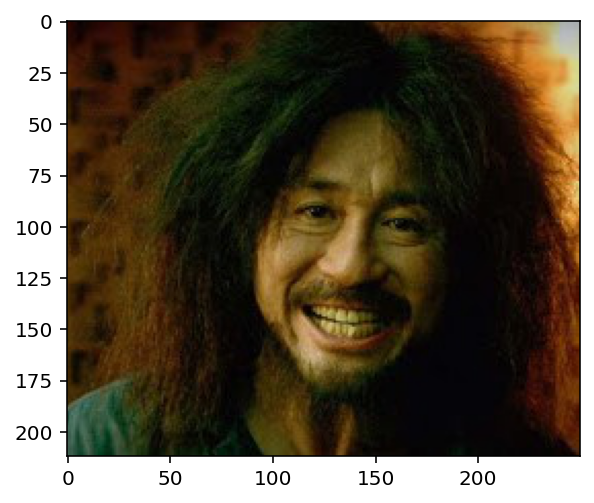

image_file_name: myImg/my_img1.jpg, 	 predition breed: Gordon setter


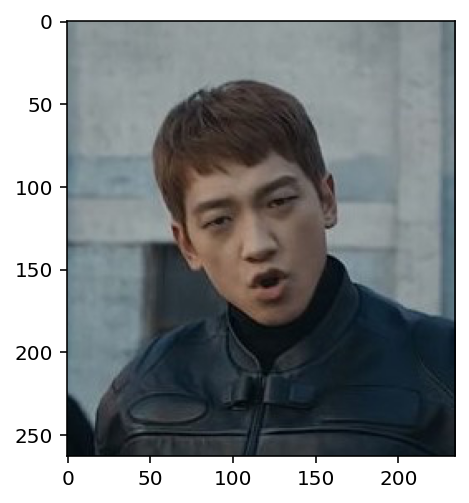

image_file_name: myImg/shadow_cat.JPG, 	 predition breed: English cocker spaniel


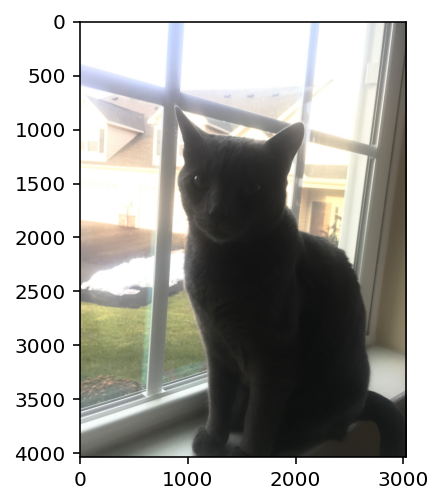

image_file_name: myImg/dog1.jpg, 	 predition breed: Belgian sheepdog


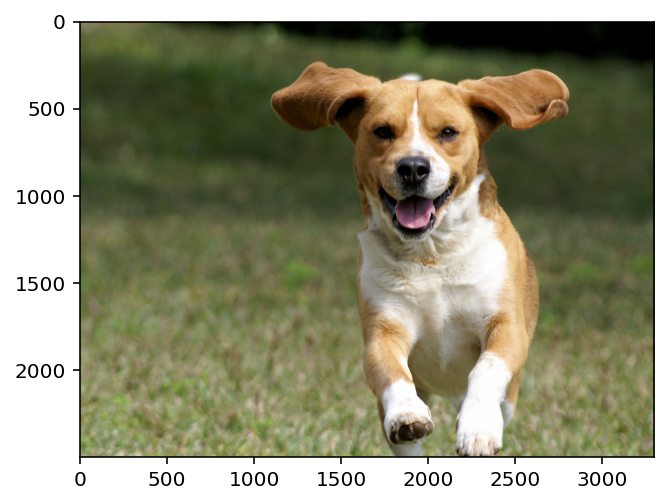

image_file_name: myImg/my_img6.jpg, 	 predition breed: Belgian sheepdog


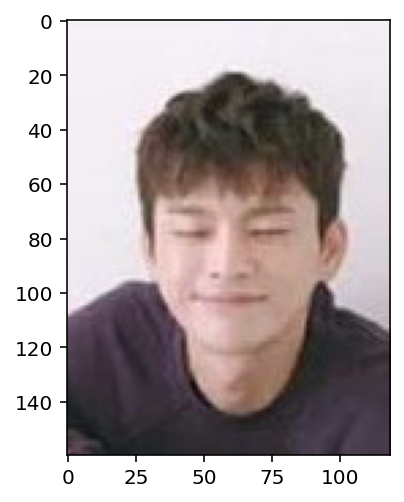

image_file_name: myImg/dogs2.jpg, 	 predition breed: Wirehaired pointing griffon


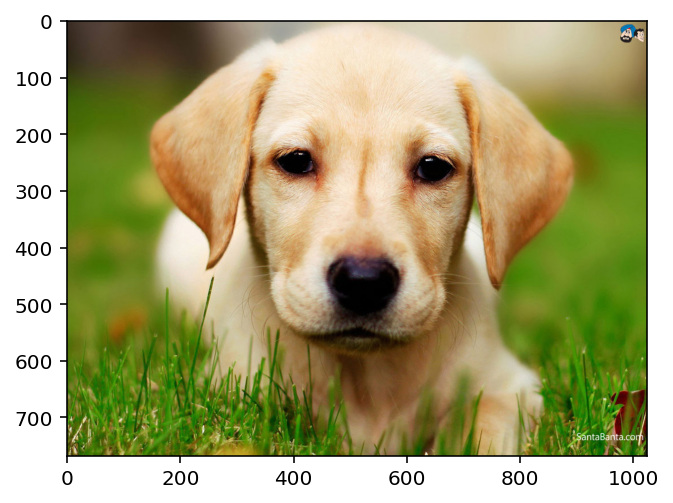

image_file_name: myImg/my_img2.jpg, 	 predition breed: Anatolian shepherd dog


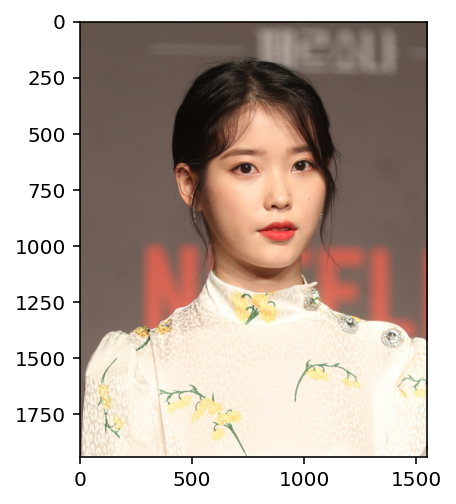

image_file_name: myImg/my_img5.jfif, 	 predition breed: Belgian sheepdog


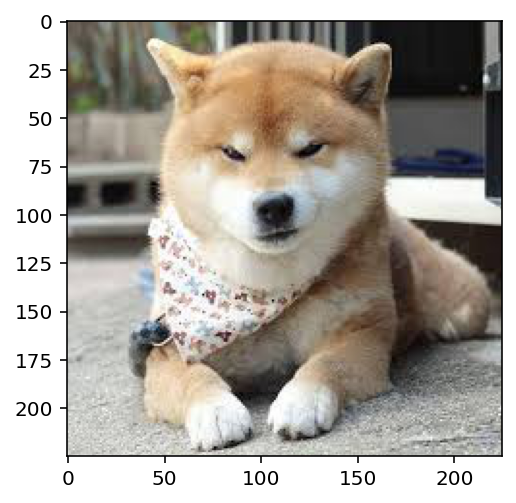

image_file_name: myImg/my_img4.jpg, 	 predition breed: Irish terrier


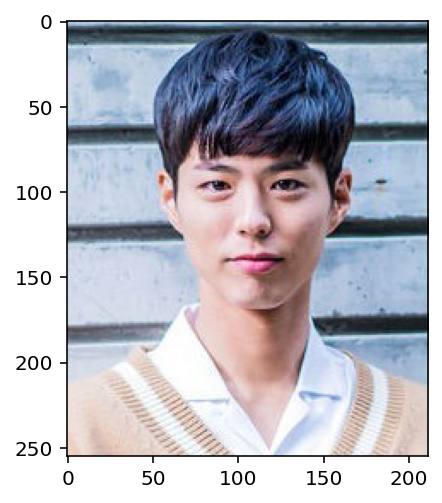

In [63]:
dirs = os.listdir('myImg')

for img_file in dirs:
    img_path = os.path.join('myImg', img_file)
    predition = predict_breed_transfer(model_transfer, class_names, img_path)
    print("image_file_name: {0}, \t predition breed: {1}".format(img_path, predition))
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.show()

---
<a id='step5'></a>
# Step 5: Make Dog Identification App

## 실제 app에 이용할 함수 구현

이미지에 대한 파일 경로를 통해 이미지에 대해서 먼저 사람, 개가 포함되어 있는지 아닌지를 결정하는 함수를 작성하세요.
- 이미지에서 __개__가 감지되면 예측 된 __품종__을 반환하십시오.
- 이미지에서 __사람__이 감지되면 __유사한 개 품종__을 반환하십시오.
- 이미지에서 __둘 다__ 아니라면 __오류__를 출력하십시오.

이미지에서 사람과 개를 감지하기 위한 함수를 작성할 수 있습니다.<br>
또한, 위에서 개발한 `face_detector` 및 `dog_detector` 함수를 자유롭게 사용하셔도 됩니다.<br>
개 품종을 예측하는 경우에는 Step 4 의 CNN을 사용해야합니다.

![Sample Human Output](https://drive.google.com/uc?export=view&id=1K7S1YJ4VflBCVKiioe2SkNkEEihUp-uI)

In [ ]:
def run_app(img_path):
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path) is True:
        prediction = predict_breed_transfer(model_transfer,class_names,img_path)
        print("Dog detected \n It looks like a {0}".format(prediction))  
    elif face_detector(img_path) > 0:
        prediction = predict_breed_transfer(model_transfer,class_names,img_path)
        print("Human detected \n It looks like a {0}".format(prediction))
    else:
        print("Nothing detected")


---
<a id='step6'></a>
# Step 6: 완성본 실험

이전 단계에서 구현한 app을 이용하여 해당 app을 사용하고 놀아봅니다.<br>
여러 이미지를 app을 통해 결과를 확인해보세요.<br>
- 여러분의 이미지를 직접 업로드하고 어떤 종류의 개가 닮았다고 출력되나요?<br>
- 개의 이미지를 직접 업로드하고 개 품종을 정확하게 예측하나요? 
- 고양이의 이미지를 직접 업로드하고 고양이를 개라고 예측하나요? 예측한다면 어떻게 예측하나요?
- 원하시면 본인 사진으로 테스트해보세요

## 구현한 Dog Identification App Test
위의 확인해야 하는 이미지의 결과를 확인하고,<br>
6개 이상의 다른 이미지를 넣어 결과를 확인하세요.<br>
원하는 이미지를 자유롭게 사용하십시오.<br>
단, 사람과 강아지의 이미지는 두 개 이상의 이미지를 사용하세요.

In [ ]:
dirs = os.listdir('myImg')

for img_file in dirs:
    img_path = os.path.join('myImg', img_file)
    predition = predict_breed_transfer(model_transfer, class_names, img_path)
    print("image_file_name: {0}, \t predition breed: {1}".format(img_path, predition))
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.show()

## **[문제 20]** 프로젝트를 마무리 하면서...

위의 프로젝트에 대한 자체 평가와 총평을 적어주세요 [점수가 들어가는 문제는 아닙니다]

한 학기 동안 열심히 가르쳐주셔서 감사합니다~
나름 공부를 열심히 했다고 생각했는데, 이번 프로젝트를 통해 많이 부족하다는 것을 알게됐습니다. 초반부터 많은 일들이 있었지만 교수님께서 잘 이끌어 주셔서 지금실력까지라도 오지 않았나 생각합니다. 초반부터 많은 질문드렸었는데 하나하나 성실히 대답 해주셔서 너무 감사했습니다~ 아직 모르는 부분이 많아 프로젝트가 원하는데로 잘 나오지 않은거 같습니다. 나름대로 정말 많은 시간을 생각하고 또 생각해 작성했습니다. 왜 이렇게 결과나 나쁘게 나오는지에 대해 생각해보고 많은것을 고쳐봤지만 이유를 잘 모르겠습니다... 이것도 저의 공부량과 공부법의 잘못으로 인한 결과라고 생각합니다. 좋은 결과로 보답해 드렸으면 좋았겠지만 이정도가 저의 최선이라고 생각합니다. 
많이 부족했던 저에게 좋은말씀, 좋은수업 제공해 주셔서  감사합니다~ 이번수업을 들으면서 딥러닝을 배우고 싶다고 처음 생각을 하였습니다. 많은 노력이 필요하겠지만, 앞으로의 진로도 이쪽으로 선택해 보려고 합니다. 나중에 기회가 생긴다면 다시 교수님 과목을 수강하고싶습니다! 그때는 더 좋은 자세로으로 배우러 가겠습니다. 감사합니다~


__[답 작성]__

# 참고자료 목차

- [1] xxx

# 부록 1: Latex 수식 예제

- 글 중간에 수식은 `$` 수식 `$`의 형태로 작성하며, $x^{(i)}_j$, $\max\{z, v\}$, $\log(1+x)$, $f(x)=\frac{1}{1+e^{-x}}$ 등과 같이 사용합니다.
- 큰 한줄 수식은 
```
$$
\sigma(x) = \frac{1}{1+\exp(-x)}
$$
```
$$
\sigma(x) = \frac{1}{1+\exp(-x)}
$$
와 같이 사용가능하며, 여러 줄의 경우는
```
\begin{align}
p(y=j|x; \theta) &=\textrm{Softmax}(\theta_j^Tx)\\
&= \frac{e^{\theta_j^T x}}{\sum_{i=1}^n e^{\theta_i^T x}} 
\end{align}
```
를 사용하면 아래와 같이 표시합니다.
\begin{align}
p(y=j|x; \theta) &=\textrm{Softmax}(\theta_j^Tx)\\
&= \frac{e^{\theta_j^T x}}{\sum_{i=1}^n e^{\theta_i^T x}} 
\end{align}

여기서 `&` 기호에 맞춰서 줄을 맞춰서 표시합니다. 여기 예제에서는 `=` 표시에 줄을 맞춰서 표시하죠. `\\` 는 줄바꿔줄때 사용하는 명령입니다

* 행렬의 경우는

$$
A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}
 $$

등을 사용할 수 있습니다.

[다른 예제](http://tomoyo.ivyro.net/123/wiki.php/TeX_%EB%B0%8F_LaTeX_%EC%88%98%EC%8B%9D_%EB%AC%B8%EB%B2%95)


# 부록 2: Markdown에 이미지 추가하기

```markdown
![대체 텍스트](이미지 경로)
```
위의 코드를 이용해 Markdown에 이미지를 추가할 수 있습니다.<br>
이미지의 경우 해당 이미지를 파일로 저장하여 이미지 경로를 직접 적어 추가 할 수 
있습니다.<br>

단, 이미지의 경로는 드라이브에 업로드한 파일의 경로를 적어야합니다.

1. [Google Drive](https://drive.google.com/drive) 에 접속하여 폴더를 하나 만든다.
2. 만든 폴더에 추가할 이미지를 업로드 한다.
3. 업로드 된 이미지를 우클릭하여 공유를 누른다.

4. [링크 보기] 에서 한림대학교에서 모든사용자로 바꾼다.
5. 링크에서 파일 ID를 가져온다. [ ex) http: ~ /d/**[파일 ID]**/view?usp=sharing ]
6. 위의 방법으로 가져온 파일 ID 를 http://drive.google.com/uc?export=view&id=[파일_ID] 에 입력하여 이미지 경로를 만들고 만든 경로를 이미지 경로 입력 부분에 입력한다.

- 대체 텍스트의 경우 이미지가 보이지 않으면 출력되는 텍스트이다.

# 부록 3: PDF 파일 & html 파일로 저장 하기

1. PDF 파일로 저장하는 방법(colab에서 최종 프로젝트를 진행하는 경우 해당 방법이 더 편합니다.)
- 브라우저는 크롬을 이용한다.
- colab의 위쪽 메뉴에 `[파일]` 을 클릭 후 `[인쇄]` 클릭
- 대상 `[PDF로 저장]`, 페이지 `[전체]`, 레이아웃 `[세로방향]` 선택
- 설정 더보기 클릭 후, 용지크기 `[A4]`, 시트당 페이지 수 `[1]`, 여백 `[기본값]`, 배율 `[맞춤설정, 70]`, 옵션 `[모두체크해제]` 선택
- `[저장]` 클릭

![예시이미지](http://drive.google.com/uc?export=view&id=1VFraRT_wKDu6qydWIWXcsHZ93Lfe0cM3)

2. html 파일로 저장하는 방법(로컬 컴퓨터에서 최종 프로젝트를 진행하는 경우 해당 방법이 더 편합니다.)
- 사용하는 브라우저는 상관없습니다.
- 프로젝트 jupyter notebook을 엽니다.
- 해당 페이지의 위쪽 메뉴에 [File]을 클릭
- [Download as]라는 메뉴 하위 메뉴에 HTML(.html) 메뉴를 클릭

위의 두가지 방법 모두 Markdown의 이미지, 코드의 출력결과를 포함하여 저장되었는지 확인하고 제출해주세요!
